In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.plotly as py
from scipy.stats import sem 
plt.style.use('ggplot')
%matplotlib inline

In [5]:
df_price = pd.read_csv("../data/player_price.csv")
df_stats = pd.read_csv("../data/player_stats.csv")

In [6]:
# convert timestamp to datetime
df_price['Date'] = pd.to_datetime(df_price['timestamp'], unit='ms')
df_price.drop(['timestamp'], axis=1, inplace=True)

# create new columns extracting month and year
df_price['DateMonth'] = df_price['Date'].dt.month
df_price['DateYear'] = df_price['Date'].dt.year
df_price['year_month'] = df_price['DateYear'].astype(str) + "_" +\
                            df_price['DateMonth'].astype(str).apply(lambda x: "0" + x if len(x) == 1 else x)

In [7]:
type(df_price['DateMonth'])

pandas.core.series.Series

In [8]:
info = df_price.merge(df_stats, how = "inner", on = "player_id")

In [9]:
df_stats.revision.unique()

array(['Legend', 'TOTS', 'TOTY', 'CMOTM', 'RB', 'TIF', 'SIF', 'IF',
       'Normal', 'FIF', 'SBC', 'TOTGS', 'Hero', 'OTW', 'MOTM', 'Movember',
       'Halloween', 'AW', 'Premium SBC', 'FUT Birthday', 'IMOTM',
       'TOTS-Reward', 'HERO', 'StPatrick', nan], dtype=object)

In [10]:
info.columns

Index(['ps_price', 'xbox_price', 'player_id', 'player_name', 'Date',
       'DateMonth', 'DateYear', 'year_month', 'acceleration', 'aggression',
       'agility', 'balance', 'ball', 'composure', 'crossing', 'curve',
       'defending', 'diving', 'dribbling', 'finishing', 'fk', 'handling',
       'heading', 'interceptions', 'jumping', 'kicking', 'long', 'marking',
       'pace', 'passing', 'penalties', 'physicality', 'positioning', 'raits',
       'reactions', 'reflexes', 'shooting', 'short', 'shot', 'sliding',
       'specialities', 'speed', 'sprint', 'stamina', 'standing', 'strength',
       'vision', 'volleys', 'cam', 'cb', 'cdm', 'cf', 'cm', 'lb', 'lf', 'lm',
       'lw', 'lwb', 'rb', 'rf', 'rm', 'rw', 'rwb', 'st', 'added_on', 'age',
       'att_workrate', 'club', 'def_workrate', 'foot', 'height',
       'intl_reputation', 'league', 'name', 'nation', 'origin', 'revision',
       'skills', 'weak_foot', 'weight', 'colour', 'front_scores',
       'overall_score', 'position', 'rareness'

In [11]:
def find_club_info(club):
    all_club_info = info[info["club"] == club]
    return all_club_info

In [12]:
def get_cards(club_name, label):
    club_info = info[info["club"] == club_name]
    cards = club_info[club_info["revision"] ==label]
    return pd.DataFrame(cards)

def get_special_cards(club_name):
    club_info = info[info["club"] == club_name]
    cards = club_info[club_info["revision"] !="Normal"]
    return pd.DataFrame(cards)

In [13]:
max_val = find_club_info("Legends")["xbox_price"].dropna().mean()
print(max_val)

509312.95869481395


In [14]:
#unique club names
club_names = info.club.unique()

clubs = []
for club in club_names:
    club_info = find_club_info(club)
    price_normal = club_info[info["revision"] == "Normal"]["xbox_price"].dropna().mean()
    price_special = club_info[info["revision"] != "Normal"]["xbox_price"].dropna().mean()
    clubs.append({"Club" : club, "Price_normal" : price_normal, "Price_special" : price_special})

df_clubs = pd.DataFrame(clubs)

C:\Users\Юля\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Юля\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


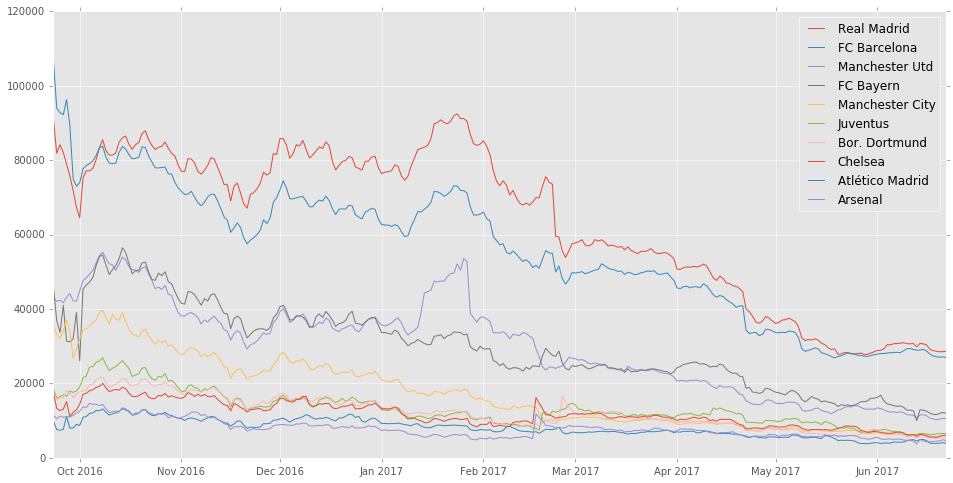

In [50]:
best_clubs = df_clubs.sort_values(by='Price_normal', ascending=False)[:10]
plt.figure(figsize=(16, 8))
for club in best_clubs.Club:
    cards = get_cards(club, "Normal")
    avg = cards.groupby(["Date"])["xbox_price"].agg(['sum', 'mean'])
    plt.plot(avg['mean'], label = club)
    plt.legend()

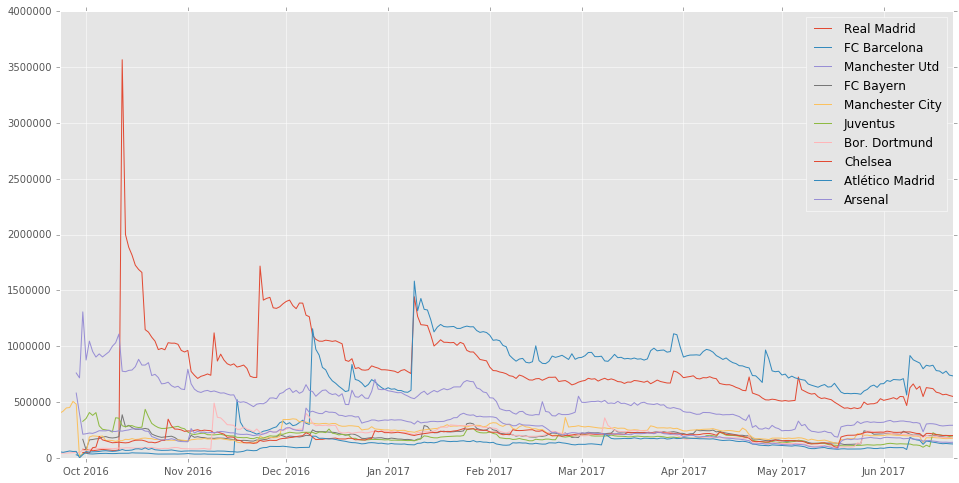

In [16]:
plt.figure(figsize=(16, 8))
for club in best_clubs.Club:
    cards = get_special_cards(club)
    time = info[["DateMonth", "DateYear"]].drop_duplicates()
    avg = cards.groupby(["Date"])["xbox_price"].agg(['sum', 'mean'])
    plt.plot(avg['mean'], label = club)
    plt.legend()

In [17]:
#unique club names
league_name = info.league.unique()

leagues = []
for league in league_name:
    league_info = info[info["league"] == league]
    price_normal = league_info[info["revision"] == "Normal"]["xbox_price"].dropna().mean()
    price_special = league_info[info["revision"] != "Normal"]["xbox_price"].dropna().mean()
    leagues.append({"League" : league, "Price_normal" : price_normal, "Price_special" : price_special})

df_leagues = pd.DataFrame(leagues)

C:\Users\Юля\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Юля\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [23]:
league_name = info.league.unique()
league_name

array(['Legends', 'LaLiga Santander', 'Calcio A', 'Premier League',
       'Bundesliga', 'Ligue 1', 'LIGA NOS', 'Süper Lig', 'Eredivisie',
       'Russian League', 'Ukrayina Liha', 'Pro League', 'EFL Championship',
       'Primera División', 'Hellas Liga', 'LIGA Bancomer MX',
       'Raiffeisen SL', 'Bundesliga 2', 'Scottish Prem'], dtype=object)

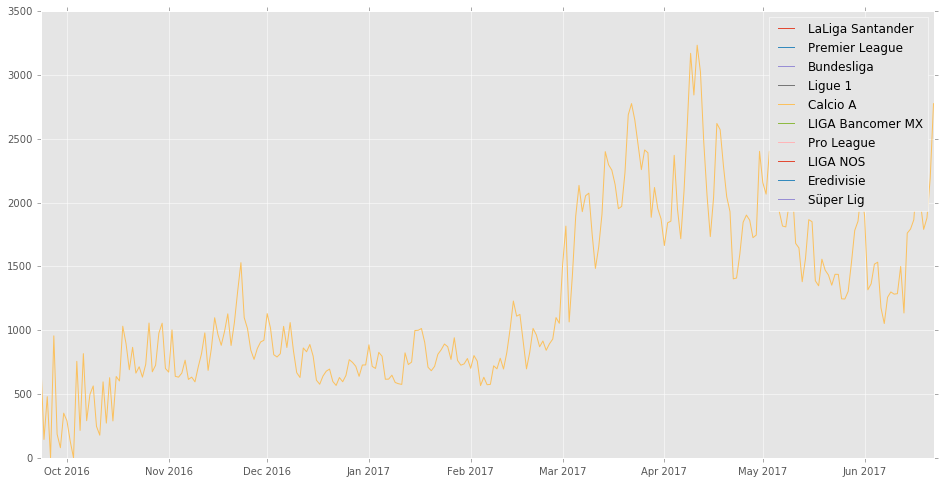

In [27]:
best_leagues = df_leagues.sort_values(by='Price_normal', ascending=False)[:10]
plt.figure(figsize=(16, 8))
for league in best_leagues.League:
    cards = info[(info["league"] == league) & (info["revision"] =="Normal")]
    avg = cards.groupby(["Date"])["xbox_price"].agg(['sum', 'mean'])
    plt.plot(avg['mean'], label = league)
    plt.legend()

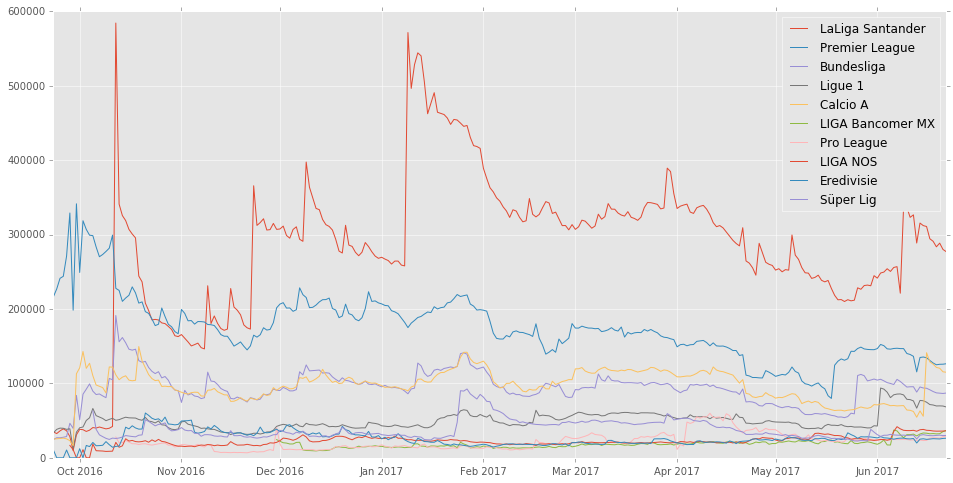

In [28]:
best_leagues = df_leagues.sort_values(by='Price_normal', ascending=False)[:10]
plt.figure(figsize=(16, 8))
for league in best_leagues.League:
    cards = info[(info["league"] == league) & (info["revision"] !="Normal")]
    avg = cards.groupby(["Date"])["xbox_price"].agg(['sum', 'mean'])
    plt.plot(avg['mean'], label = league)
    plt.legend()

In [29]:
info["weekday"] = info["Date"].apply(lambda x: x.weekday())

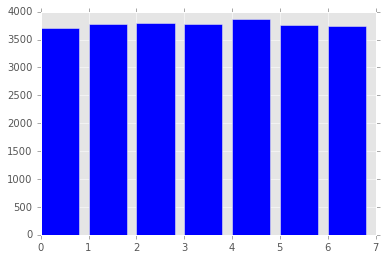

In [39]:
y_pos = np.arange(7)
cards = info[info["revision"] =="Normal"]
avg_norm = cards.groupby(["weekday"])["xbox_price"].agg(['mean'])
plt.bar(y_pos, avg_norm['mean'], color='b')
plt.show()

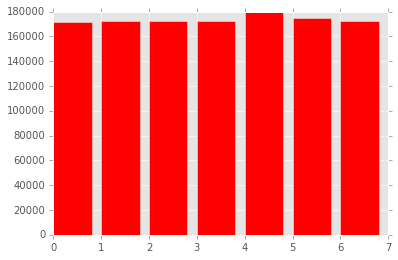

In [40]:
y_pos = np.arange(7)
cards_sp = info[info["revision"] !="Normal"]
avg_sp = cards_sp.groupby(["weekday"])["xbox_price"].agg(['mean'])
plt.bar(y_pos, avg_sp['mean'], color='r')
plt.show()

In [51]:
#unique club names
nation_name = info.nation.unique()

nations = []
for nation in nation_name:
    nation_info = info[info["nation"] == nation]
    price_normal = nation_info[info["revision"] == "Normal"]["xbox_price"].dropna().mean()
    price_special = nation_info[info["revision"] != "Normal"]["xbox_price"].dropna().mean()
    nations.append({"Nation" : nation, "Price_normal" : price_normal, "Price_special" : price_special})

df_nations = pd.DataFrame(nations)

C:\Users\Юля\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Юля\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



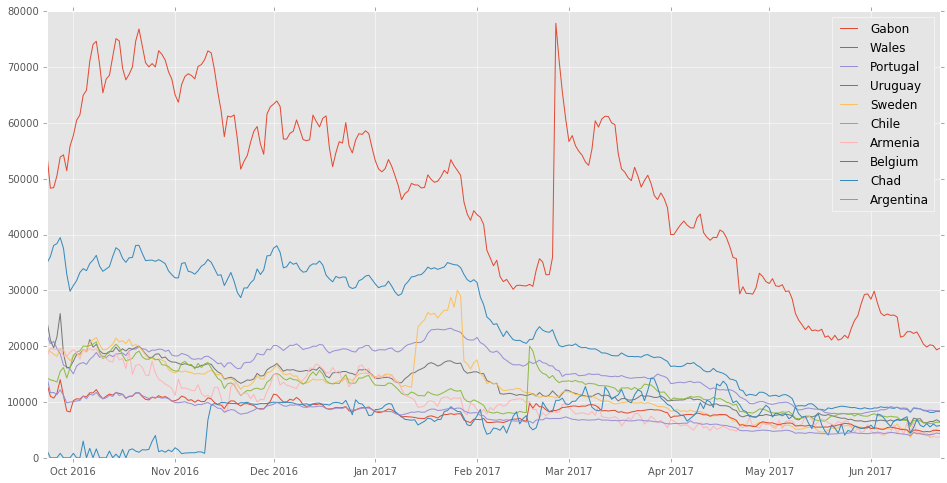

In [55]:
best_nations = df_nations.sort_values(by='Price_normal', ascending=False)[:10]
plt.figure(figsize=(16, 8))
for nation in best_nations.Nation:
    cards = info[(info["nation"] == nation) & (info["revision"] =="Normal")]
    avg = cards.groupby(["Date"])["xbox_price"].agg(['sum', 'mean'])
    plt.plot(avg['mean'], label = nation)
    plt.legend()

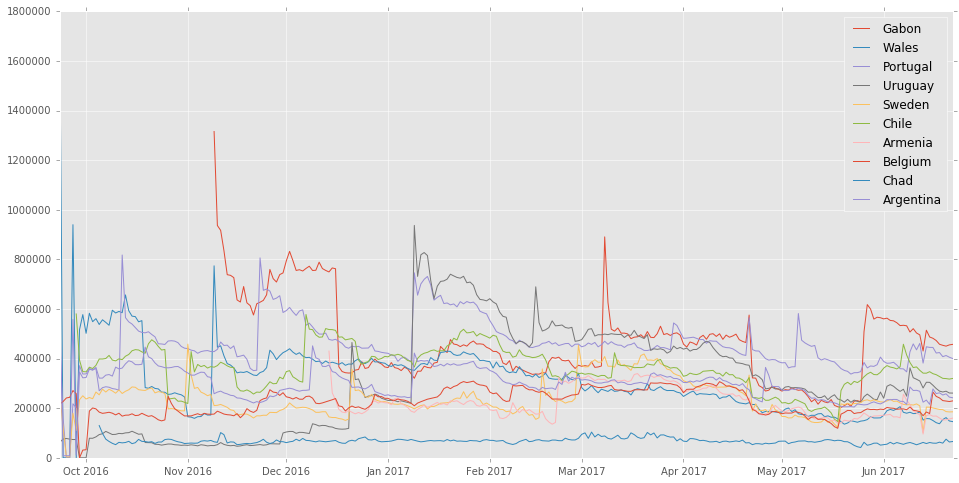

In [56]:
best_nations = df_nations.sort_values(by='Price_normal', ascending=False)[:10]
plt.figure(figsize=(16, 8))
for nation in best_nations.Nation:
    cards = info[(info["nation"] == nation) & (info["revision"] !="Normal")]
    avg = cards.groupby(["Date"])["xbox_price"].agg(['sum', 'mean'])
    plt.plot(avg['mean'], label = nation)
    plt.legend()